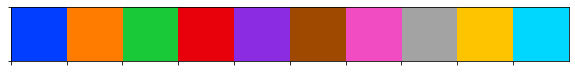

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# try different palette for plotting
# sns.set_palette(sns.color_palette("Paired", 20))
# sns.set_palette(sns.diverging_palette(255, 133, l=60, n=16, center="dark"))
colors3 = ["#9d6d00", "#903ee0", "#11dc79", "#f568ff", "#419500", "#013fb0", 
          "#f2b64c", "#007ae4", "#ff905a", "#33d3e3", "#9e003a", "#019085", 
          "#950065", "#afc98f", "#ff9bfa", "#83221d", "#01668a", "#ff7c7c", 
          "#643561", "#75608a"]
palette1 = sns.color_palette("BuGn", 6)[::-1][:4] \
           + sns.color_palette("OrRd", 6)[1:] \
           + sns.color_palette("PuBu", 6)[::-1][:-2] \
           + sns.color_palette("RdGy", 10)[6:]
palette1 = sns.color_palette("BuGn", 3) \
           + sns.color_palette("OrRd", 3) \
           + sns.color_palette("PuBu", 3) \
           + sns.color_palette("RdGy", 6)[::-1][:1]
sns.set_palette("bright",10)
sns.palplot(sns.color_palette())

In [2]:
# source https://github.com/CSSEGISandData/COVID-19/
# transpose matrices for better data handling

# update from source
! curl https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv > ../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
! curl https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv > ../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
! curl https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv > ../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv

# confirmed COVID-19 positive cases
conf = pd.read_csv("../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv").transpose()
# deceased cases
deaths = pd.read_csv("../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv").transpose()
# recovery cases
recover = pd.read_csv("../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv").transpose()

conf.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 48844  100 48844    0     0  48844      0  0:00:01 --:--:--  0:00:01 76318
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 41343  100 41343    0     0  41343      0  0:00:01 --:--:--  0:00:01  184k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 42056  100 42056    0     0  42056      0  0:

,0,1,2,3,4,5,6,7,8,9,...,239,240,241,242,243,244,245,246,247,248
Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,New South Wales,...,NaN,NaN,NaN,NaN,NaN,NaN,Northwest Territories,Yukon,NaN,NaN
Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,Laos,Libya,West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis,Canada,Canada,Kosovo,Burma
Lat,33,41.1533,28.0339,42.5063,-11.2027,17.0608,-38.4161,40.0691,-35.4735,-33.8688,...,19.8563,26.3351,31.9522,11.8037,17.5707,17.3578,64.8255,64.2823,42.6026,21.9162
Long,65,20.1683,1.6596,1.5218,17.8739,-61.7964,-63.6167,45.0382,149.012,151.209,...,102.495,17.2283,35.2332,-15.1804,-3.99617,-62.783,-124.846,-135,20.903,95.956
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# assign second row as column names
conf.columns = conf.iloc[1]
deaths.columns = deaths.iloc[1]
recover.columns = recover.iloc[1]

In [4]:
# remove first 4 rows
conf = conf.iloc[4:]
deaths = deaths.iloc[4:]
recover = recover.iloc[4:]

In [5]:
# list contry names
# set(list(conf.columns.values))

In [6]:
# data are divided by province: sum provinces to obtain numbers by country
# China was not affected uniformly, therefore the population scaled numbers appear low (I will add the provence numbers lated)
conf = conf.groupby(by=conf.columns, axis=1).sum()
deaths = deaths.groupby(by=deaths.columns, axis=1).sum()
recover = recover.groupby(by=recover.columns, axis=1).sum()

In [7]:
# pos_1_10 = conf.max().sort_values(ascending=False)[:10].index
contries_ordered = conf.max().sort_values(ascending=False)
print(contries_ordered[:10])

Country/Region
US                101657.0
Italy              86498.0
China              81897.0
Spain              65719.0
Germany            50871.0
France             33402.0
Iran               32332.0
United Kingdom     14745.0
Switzerland        12928.0
Korea, South        9332.0
dtype: float64


In [8]:
# select only countries with > 900 positive COVID-19 cases
# selected_columns = conf.max()>900
# selected_columns = conf.max().sort_values(ascending=False)[:10]
# conf = conf.loc[:,selected_columns]
# deaths = deaths.loc[:,selected_columns]
# recover = recover.loc[:,selected_columns]

# sort columns by total number of positive cases
# # conf = conf.sort_values(conf.last_valid_index(), axis=1, ascending=False)
# deaths = deaths.sort_values(deaths.last_valid_index(), axis=1, ascending=False)
# recover = recover.sort_values(recover.last_valid_index(), axis=1, ascending=False)

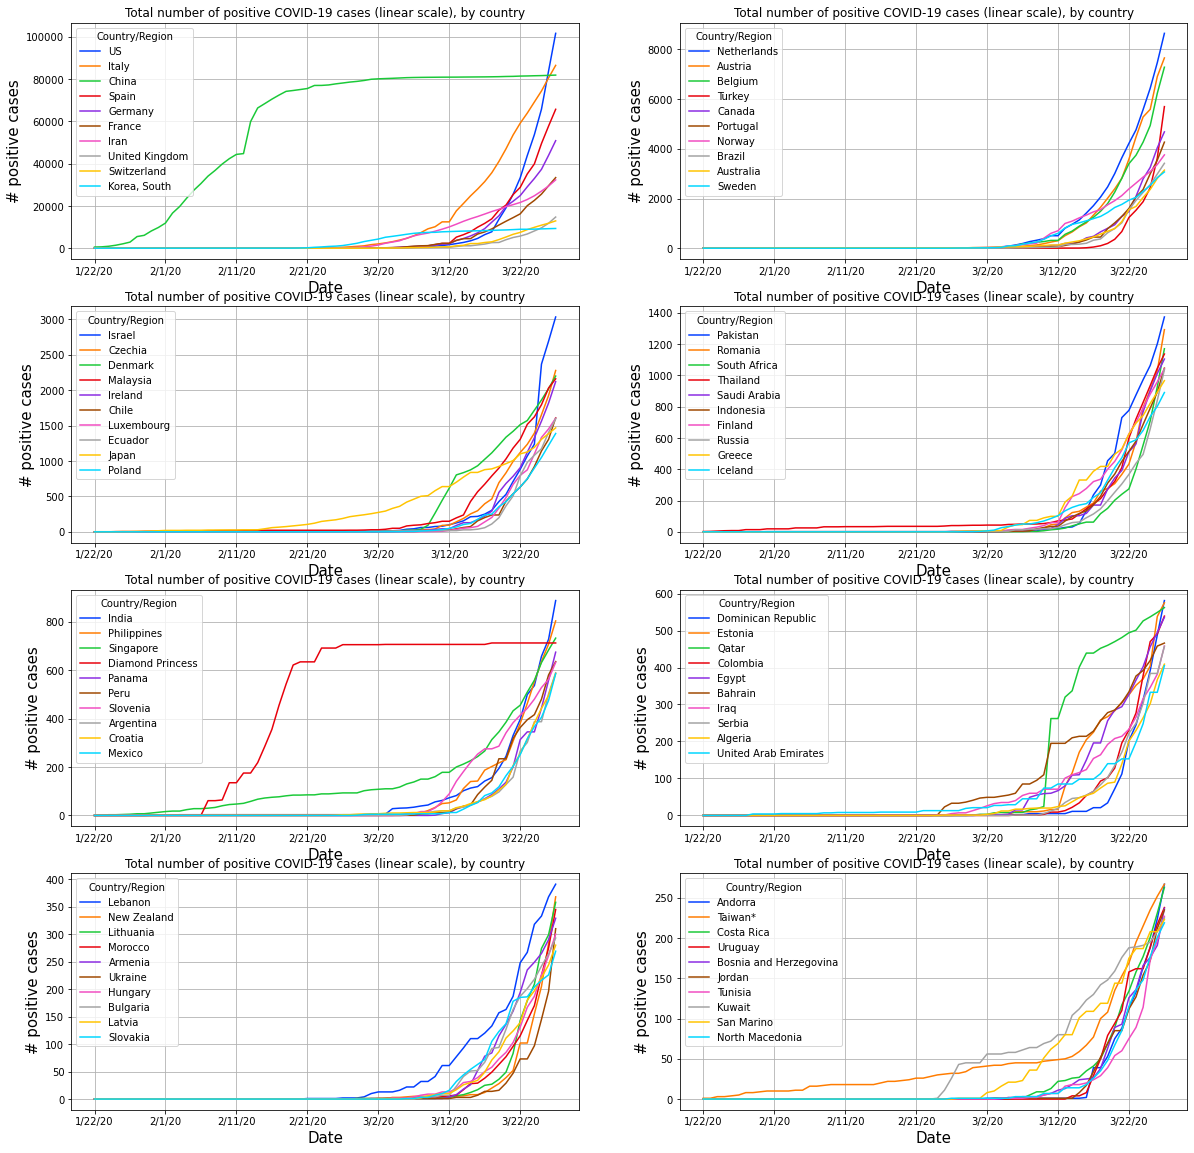

In [9]:
nrow=4
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*10:(count+1)*10].index
        # print(count*10,(count+1)*10,plot_countries)
        conf[plot_countries].plot(grid=True, ax=axes[r,c],
                 title='Total number of positive COVID-19 cases (linear scale), by country', figsize = (20,20))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("# positive cases", fontsize=15)
        count+=1

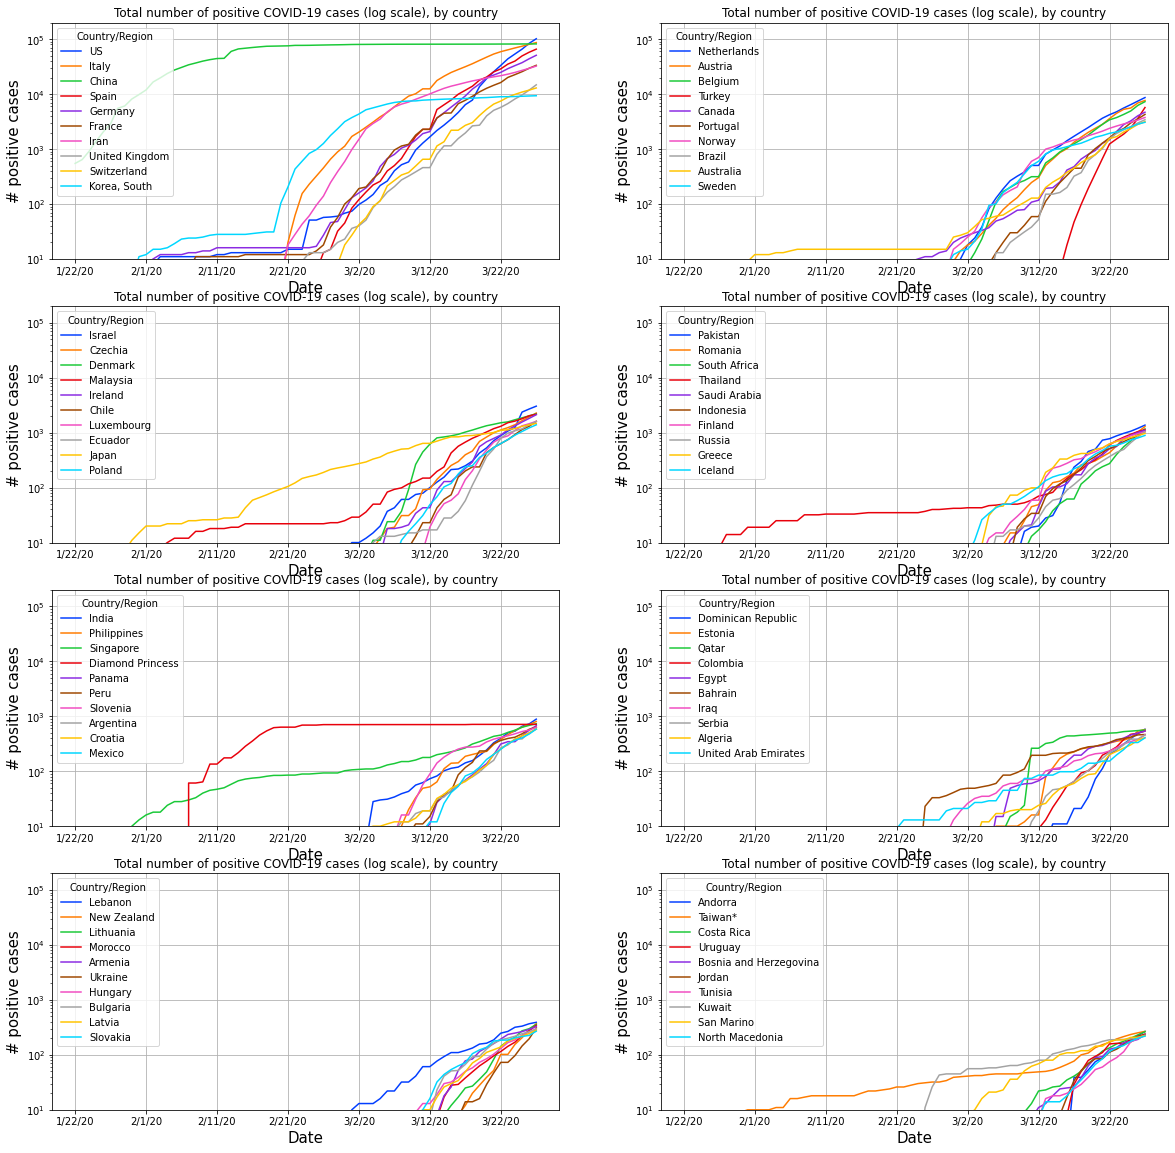

In [10]:
nrow=4
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*10:(count+1)*10].index
        # print(count*10,(count+1)*10,plot_countries)
        conf[plot_countries].plot(logy=True, grid=True, ax=axes[r,c],
                 title='Total number of positive COVID-19 cases (log scale), by country', figsize = (20,20))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("# positive cases", fontsize=15)
        axes[r,c].set_ylim(1e1,2e5)
        count+=1

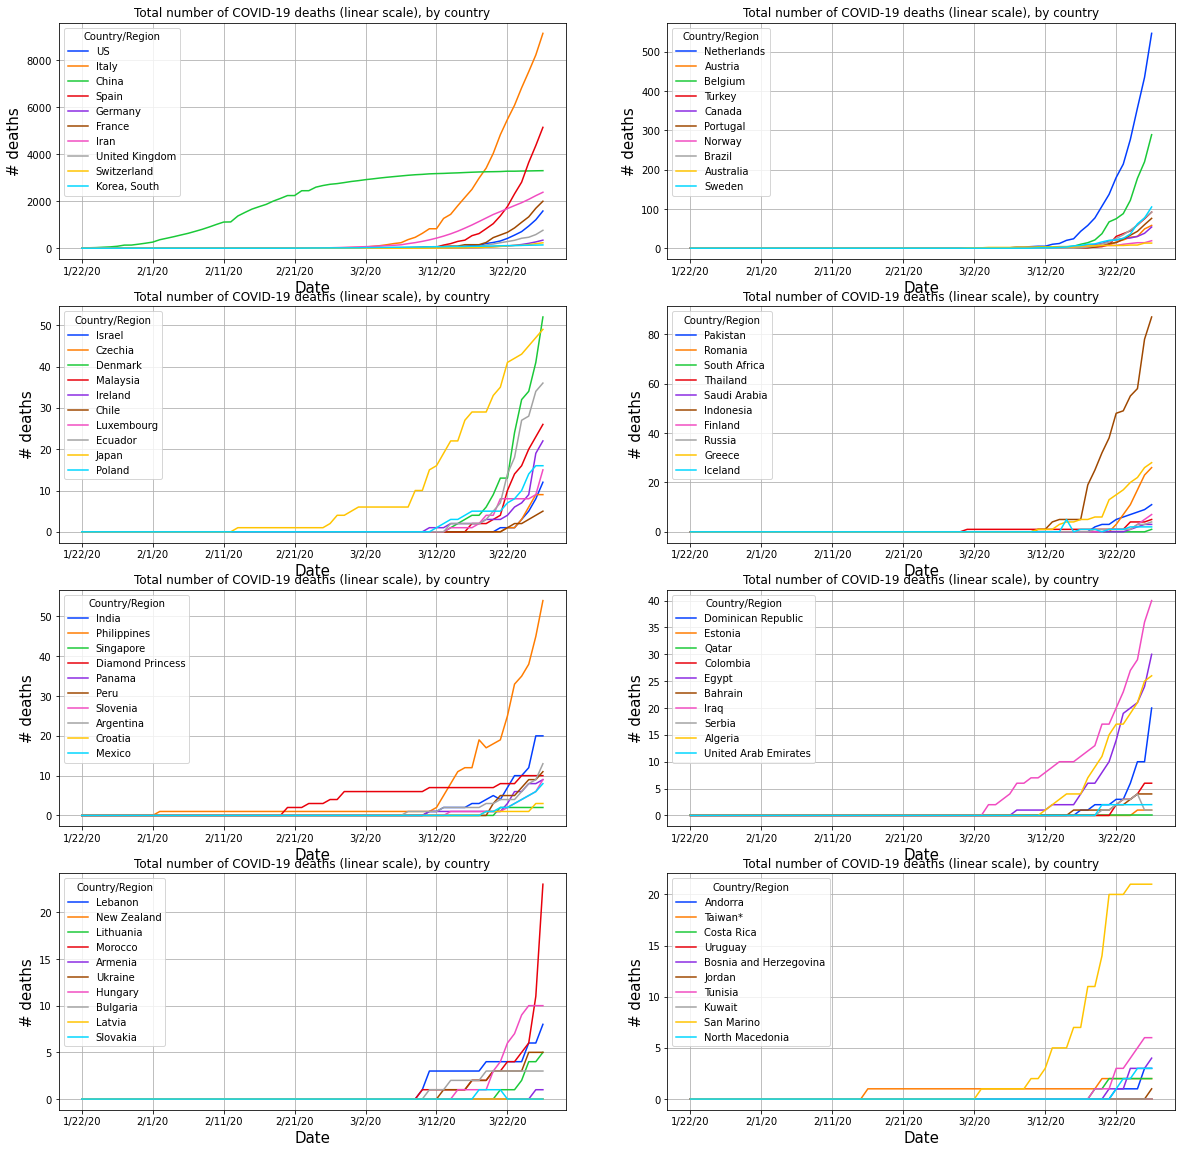

In [11]:
nrow=4
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*10:(count+1)*10].index
        # print(count*10,(count+1)*10,plot_countries)
        deaths[plot_countries].plot(grid=True, ax=axes[r,c],
                 title='Total number of COVID-19 deaths (linear scale), by country', figsize = (20,20))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("# deaths", fontsize=15)
        count+=1

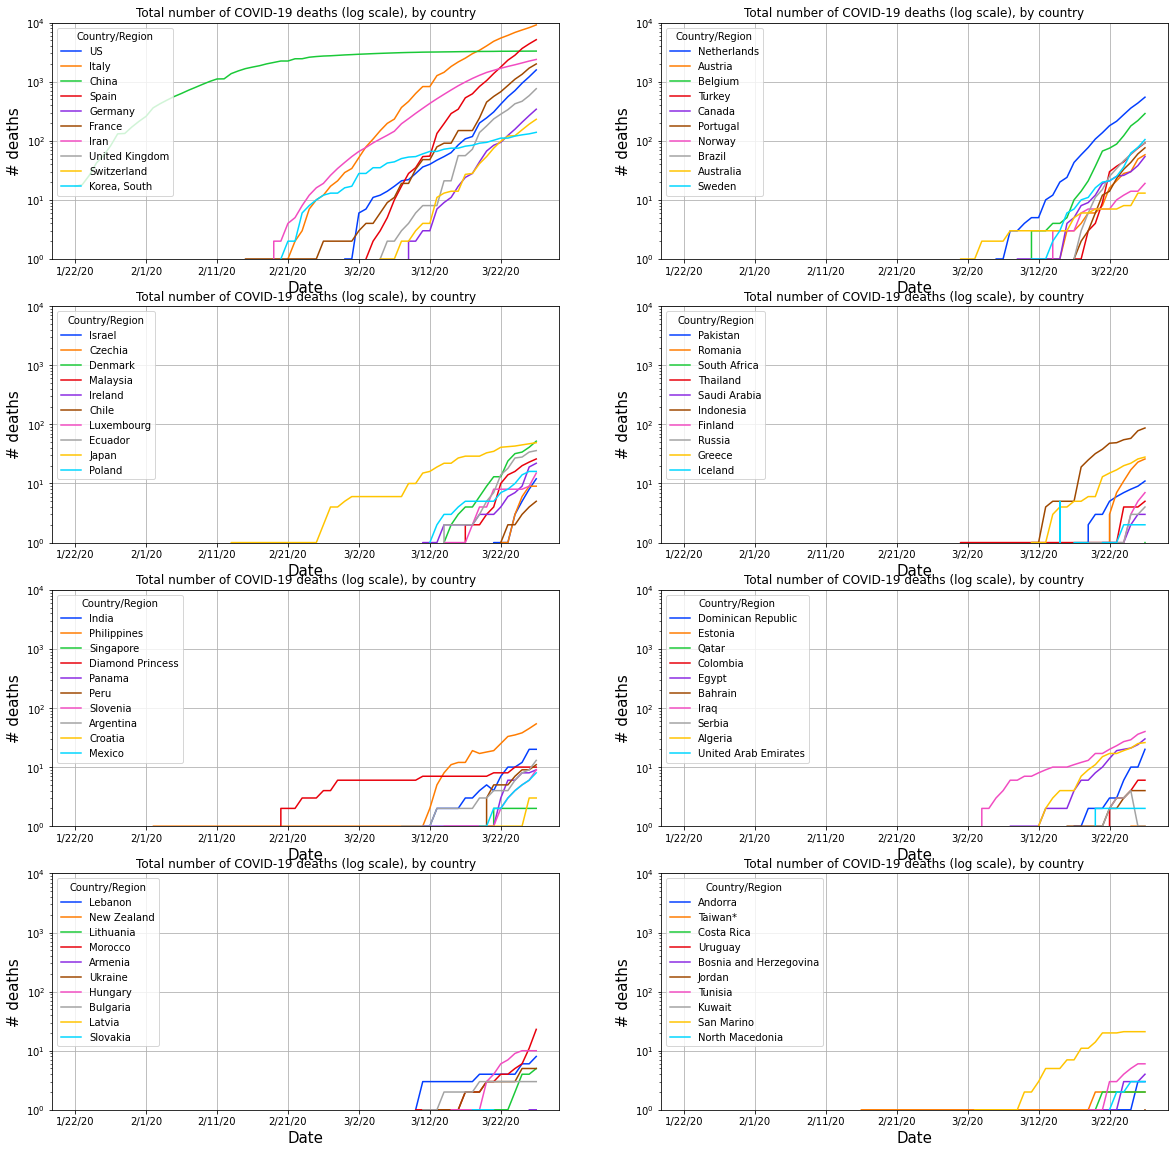

In [12]:
nrow=4
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*10:(count+1)*10].index
        # print(count*10,(count+1)*10,plot_countries)
        deaths[plot_countries].plot(logy=True, grid=True, ax=axes[r,c],
                 title='Total number of COVID-19 deaths (log scale), by country', figsize = (20,20))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("# deaths", fontsize=15)
        axes[r,c].set_ylim(1e0,1e4)
        count+=1

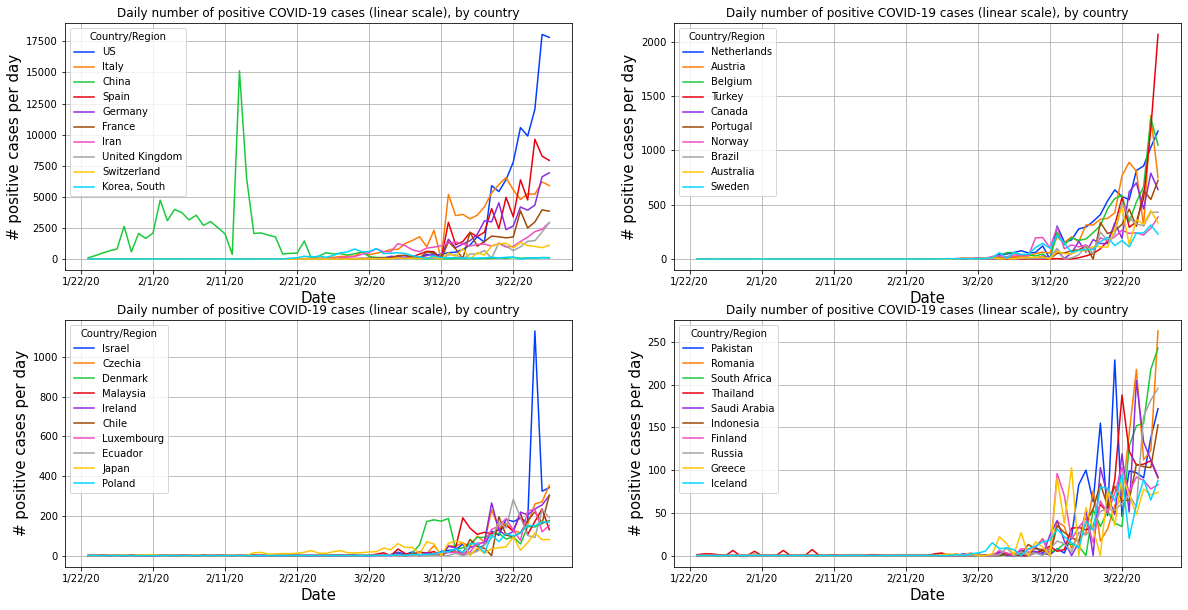

In [13]:
conf_daily = conf - conf.shift(1)

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*10:(count+1)*10].index
        # print(count*10,(count+1)*10,plot_countries)
        conf_daily[plot_countries].plot(grid=True, ax=axes[r,c],
                 title='Daily number of positive COVID-19 cases (linear scale), by country', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("# positive cases per day", fontsize=15)
        count+=1

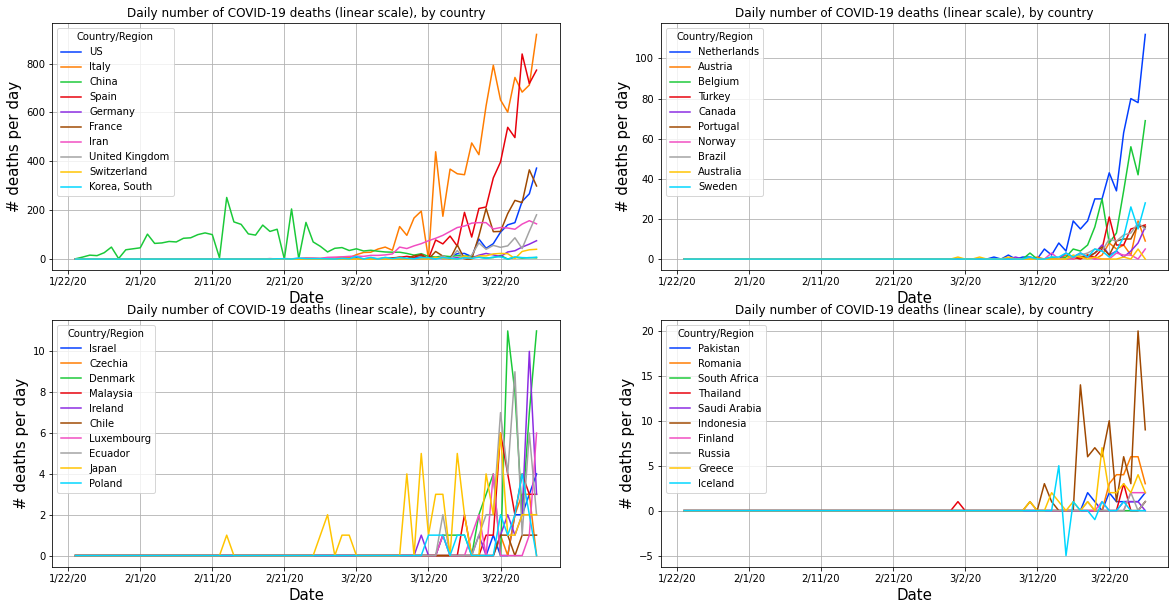

In [14]:
deaths_daily = deaths - deaths.shift(1)

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*10:(count+1)*10].index
        # print(count*10,(count+1)*10,plot_countries)
        deaths_daily[plot_countries].plot(grid=True, ax=axes[r,c],
                 title='Daily number of COVID-19 deaths (linear scale), by country', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("# deaths per day", fontsize=15)
        count+=1

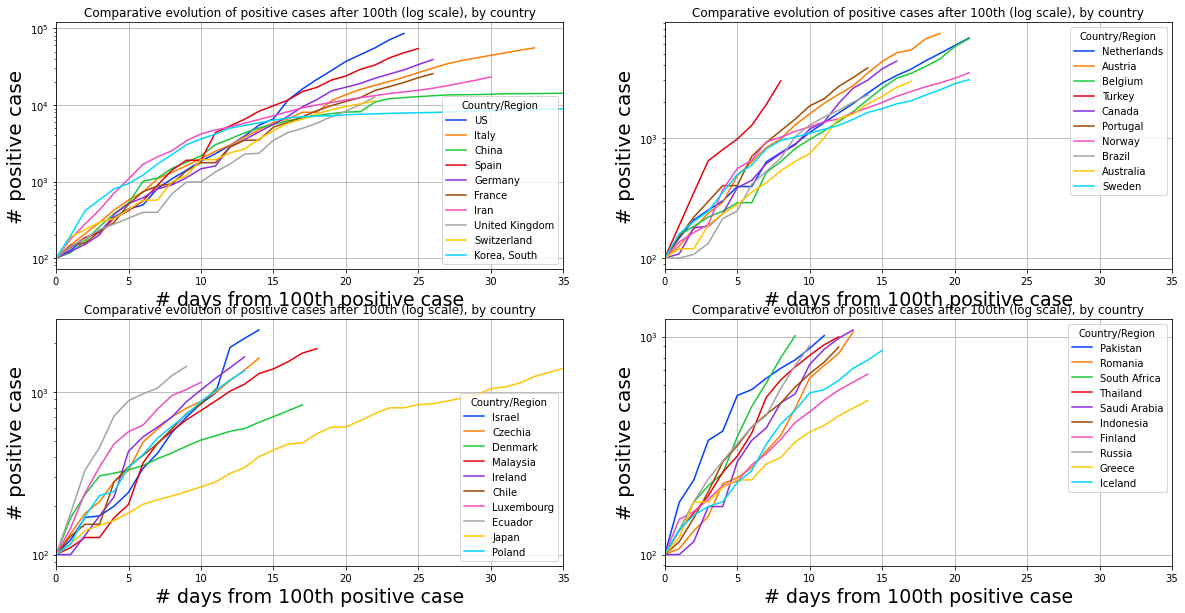

In [15]:
count_after = 100
conf_align_start = conf[conf > count_after]
conf_align_start = conf_align_start.apply(lambda x: pd.Series(x.dropna().values))
conf_align_start = conf_align_start.loc[:].div(conf_align_start.iloc[0][:]/count_after) # normalize to same start

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*10:(count+1)*10].index
        # print(count*10,(count+1)*10,plot_countries)
        conf_align_start[plot_countries].plot(logy=True, grid=True, ax=axes[r,c],
                 title='Comparative evolution of positive cases after 100th (log scale), by country', figsize = (20,10))
        axes[r,c].set_xlabel("# days from 100th positive case", fontsize=19)
        axes[r,c].set_ylabel("# positive case", fontsize=20)
        axes[r,c].set_xlim(0,35)
        count+=1

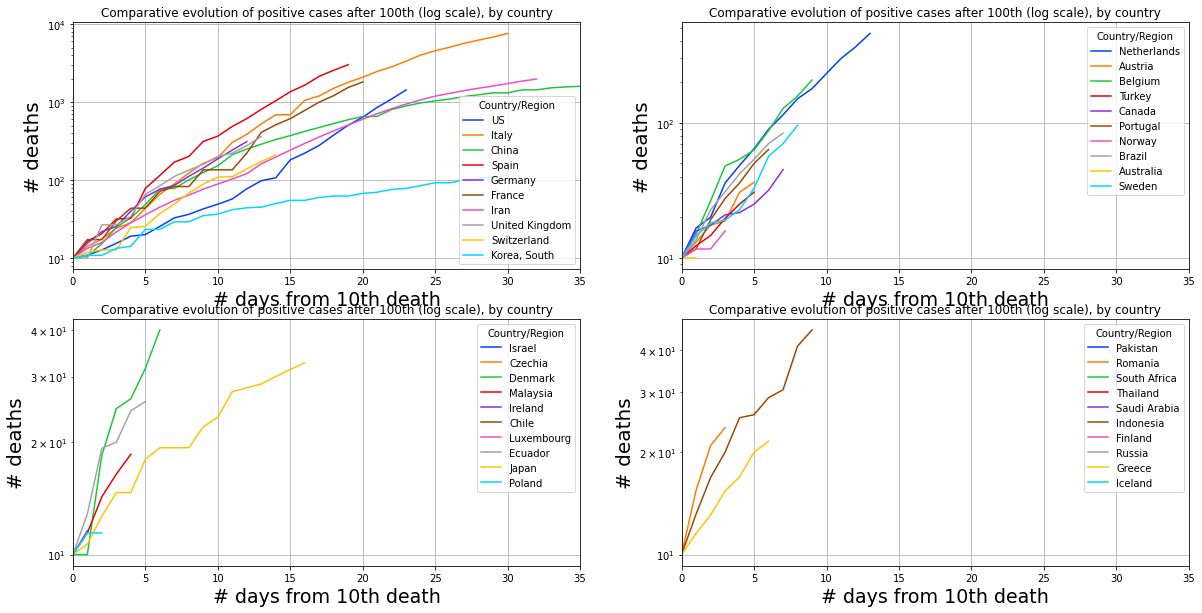

In [34]:
count_after = 10
deaths_align_start = deaths[deaths > count_after] 
deaths_align_start = deaths_align_start.apply(lambda x: pd.Series(x.dropna().values))
deaths_align_start = deaths_align_start.loc[:].div(deaths_align_start.iloc[0][:]/count_after)

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)
# fig.suptitle("Title centered above all subplots", fontsize=20)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*10:(count+1)*10].index
        # print(count*10,(count+1)*10,plot_countries)
        deaths_align_start[plot_countries].plot(logy=True, grid=True, ax=axes[r,c],
                 title='Comparative evolution of positive cases after 100th (log scale), by country', figsize = (20,10))
        axes[r,c].set_xlabel("# days from 10th death", fontsize=19)
        axes[r,c].set_ylabel("# deaths", fontsize=20)
        axes[r,c].set_xlim(0,35)
        count+=1

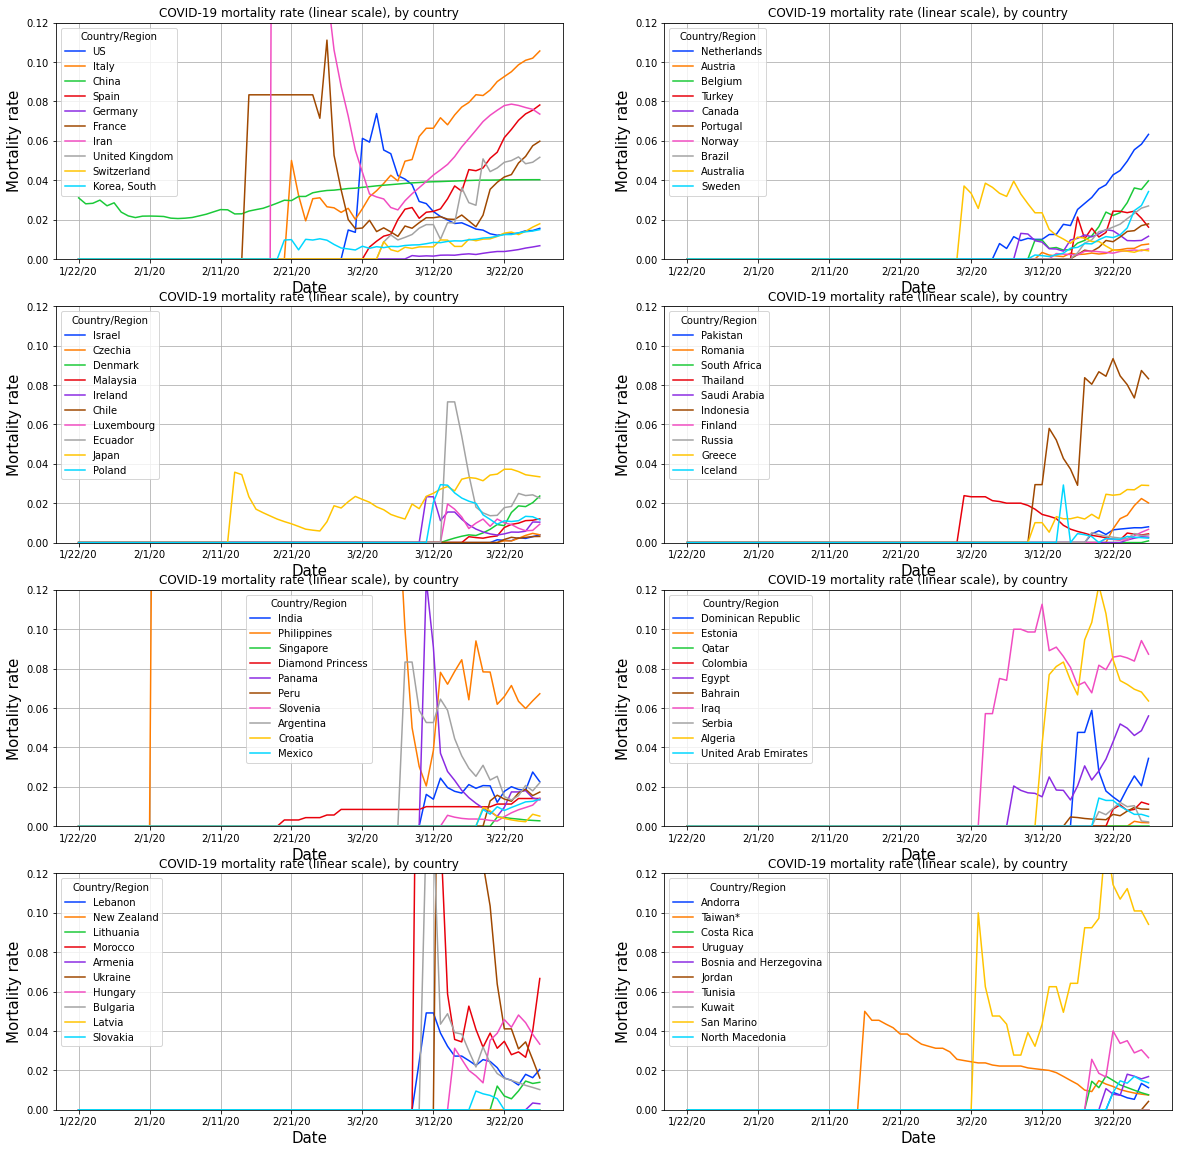

In [17]:
mortality = deaths.divide(conf.replace(0, 1))

nrow=4
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*10:(count+1)*10].index
        # print(count*10,(count+1)*10,plot_countries)
        mortality[plot_countries].plot(grid=True, ax=axes[r,c],
                 title='COVID-19 mortality rate (linear scale), by country', figsize = (20,20))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("Mortality rate", fontsize=15)
        axes[r,c].set_ylim(0,0.12)
        count+=1

In [18]:
# retrieve population information
# source https://population.un.org/wpp/Download/Standard/Population/
population = pd.read_csv("../external_data/WPP2019_TotalPopulationBySex.csv")

In [19]:
# select only country codes for year 2020, transpose and remove columns to make it similar to COVID-19 data
population = population[(population["Time"] == 2020) & (population["VarID"] == 2) & (population["LocID"] < 910)]
population = population[["Location","PopTotal"]].transpose()
population.columns = population.iloc[0]
population = population.iloc[1:]
population.head()
# population numbers are expressed in 1e3

Location,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,World,Yemen,Zambia,Zimbabwe
PopTotal,38928.3,1.3406e+06,2877.8,43851,55.197,77.265,32866.3,15.002,97.928,45195.8,...,33469.2,307.15,28435.9,97338.6,11.246,597.33,7.7948e+06,29826,18384,14862.9


In [20]:
# list country names
# set(list(population.columns.values))

In [21]:
# rename population country names that don't match COVID-19 data
population = population.rename(columns={
 'Bolivia (Plurinational State of)': 'Bolivia',
 'Brunei Darussalam': 'Brunei',
 'Congo (Kinshasa)': 'Congo',
 "Cote d'Ivoire":  "Côte d'Ivoire",
 'Iran (Islamic Republic of)':  'Iran',
 'Republic of Korea': 'Korea, South',
 'Republic of Moldova':  'Moldova',
 'Russian Federation':  'Russia',
 'China, Taiwan Province of China':  'Taiwan*',
 'United States of America':  'US',
 'Viet Nam':  'Vietnam'
    }
        )

In [22]:
# concatenate dataset
conf_pop_norm = pd.concat([population,conf])
conf_pop_norm.head()

,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Congo (Brazzaville),Congo (Kinshasa),Cote d'Ivoire,Diamond Princess,Kosovo,Laos,Syria,Tanzania,Venezuela,West Bank and Gaza
PopTotal,38928.3,1.3406e+06,2877.8,43851,55.197,77.265,32866.3,15.002,97.928,45195.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/22/20,0,NaN,0,0,NaN,0,0,NaN,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/23/20,0,NaN,0,0,NaN,0,0,NaN,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0,NaN,0,0,NaN,0,0,NaN,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0,NaN,0,0,NaN,0,0,NaN,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# divide cases rows by population/10 row to obtain number of cases per 1e4 persons
conf_pop_norm = conf_pop_norm.loc[:].div(conf_pop_norm.iloc[0][:]/10)

In [24]:
# remove population row
conf_pop_norm = conf_pop_norm.iloc[1:]
conf_pop_norm.dropna(axis=1, inplace=True)
conf_pop_norm.tail()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,US,Uruguay,Uzbekistan,Vietnam,Zambia,Zimbabwe
3/23/20,0.0102753,0.361387,0.0524503,17.2135,0.00091279,0.306348,0.0665991,0.793052,0.659611,4.96758,...,0.0019676,0.0166919,0.200194,0.990779,1.32467,0.466358,0.013744,0.0126363,0.00163186,0.00201844
3/24/20,0.0190093,0.42741,0.0602038,21.2257,0.00091279,0.306348,0.0856275,0.840298,0.801572,5.86583,...,0.0019676,0.0221797,0.250748,1.2026,1.62355,0.466358,0.0149391,0.0137664,0.00163186,0.00201844
3/25/20,0.0215781,0.507332,0.0688695,24.3318,0.00091279,0.306348,0.0856275,0.894293,0.927063,6.20448,...,0.00306071,0.0331552,0.33669,1.42003,1.98723,0.544084,0.0179269,0.0144855,0.00652743,0.00201844
3/26/20,0.0241469,0.604629,0.0836924,28.9911,0.00121705,0.714811,0.111072,0.97866,1.10197,7.67121,...,0.00306071,0.0448166,0.33669,1.73998,2.53279,0.624689,0.0224087,0.0157183,0.00870324,0.00201844
3/27/20,0.028257,0.646327,0.0932703,34.5564,0.00121705,0.714811,0.130322,1.11027,1.23255,8.50173,...,0.00502831,0.0708835,0.409488,2.17202,3.07118,0.685143,0.0262928,0.0167457,0.011967,0.00336407


In [25]:
contries_pop_norm_ordered = conf_pop_norm.max().sort_values(ascending=False)
small_countries = ["San Marino", "Holy See"]


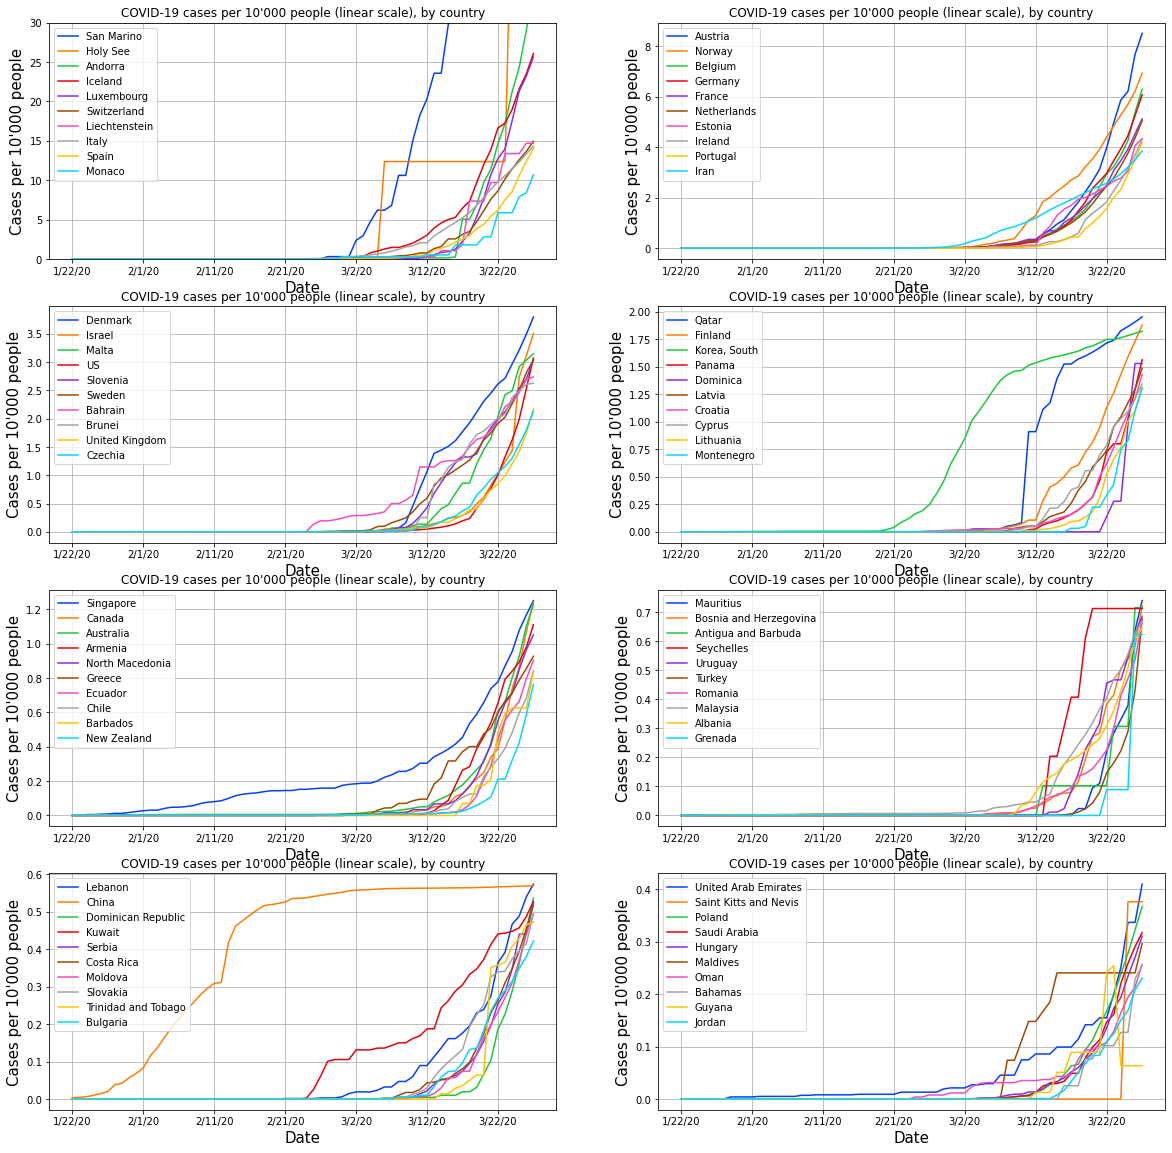

In [26]:
nrow=4
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)


for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_pop_norm_ordered[count*10:(count+1)*10].index.to_list()
        # plot_countries = [country for country in plot_countries if (country not in small_countries)]
        plot_countries = [country for country in plot_countries if not "Cruise" in country]
        # print(count*10,(count+1)*10,plot_countries)
        conf_pop_norm[plot_countries].plot(grid=True, ax=axes[r,c],
                 title="COVID-19 cases per 10'000 people (linear scale), by country", figsize = (20,20))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("Cases per 10'000 people", fontsize=15)
        if r==0 and c==0:
            axes[r,c].set_ylim(0,30)
        count+=1

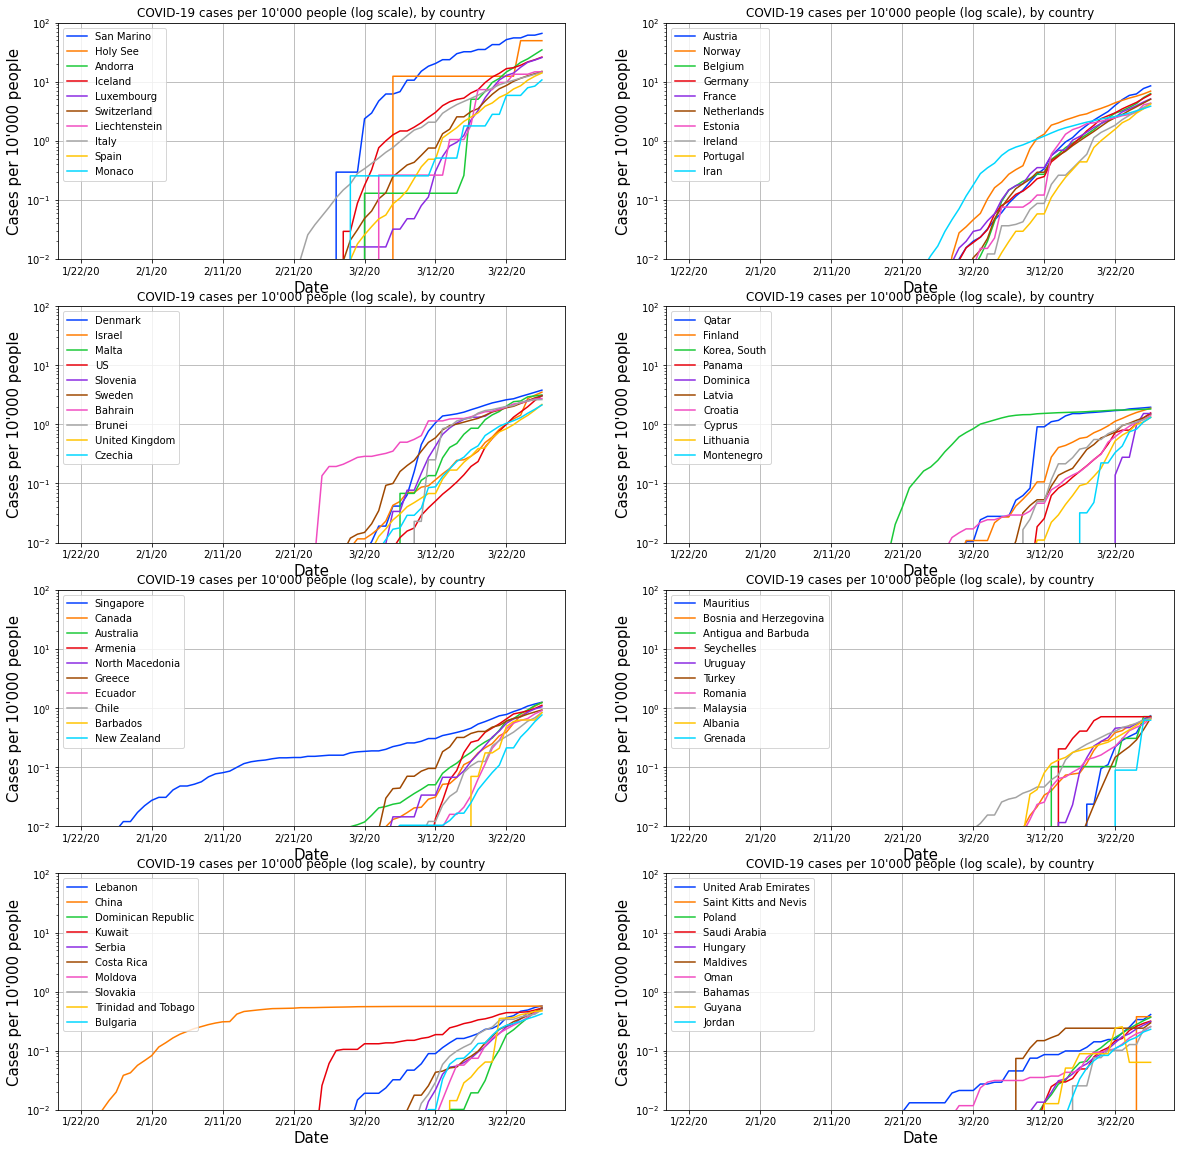

In [27]:
nrow=4
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_pop_norm_ordered[count*10:(count+1)*10].index.to_list()
        plot_countries = [country for country in plot_countries if not "Cruise" in country]
        # print(count*10,(count+1)*10,plot_countries)
        conf_pop_norm[plot_countries].plot(logy=True, grid=True, ax=axes[r,c],
                 title="COVID-19 cases per 10'000 people (log scale), by country", figsize = (20,20))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("Cases per 10'000 people", fontsize=15)
        axes[r,c].set_ylim(1e-2,1e2)
        count+=1

In [28]:
# Source: https://ourworldindata.org/coronavirus-testing-source-data

# Handle test data
tests = pd.read_excel("../external_data/Worldwide_COVID19_tests.xlsx").transpose()
# tests.set_index('Date', inplace=True)
tests = tests.rename(columns=tests.iloc[0])
tests = tests.iloc[1:]
tests = tests.dropna(axis=1)
tests = tests.iloc[0:2].transpose()
tests.head()

,Total tests,Date
Armenia,813,2020-03-18
Australia – Queensland,27000,2020-03-19
Australia – New South Wales,"39,089",2020-03-19
Australia – Australian Capital Territory,2062,2020-03-20
Australia – Western Australia,8603,2020-03-19


In [29]:
test_conf = tests.copy()
test_conf["conf"] = np.nan
test_conf["deaths"] = np.nan

for i, country in enumerate(test_conf.index.to_list()):
    # test_conf["conf"][i] = 0
    # test_conf["deaths"][i] = 0
    if country in conf.columns.to_list():
        test_date = test_conf["Date"][i].date().strftime("%#m/%#d/%y")
        if test_date in conf.index.tolist():
            test_conf["conf"][i] = conf[country].loc[ test_date ]
            test_conf["deaths"][i] = deaths[country].loc[ test_date ]

test_conf.dropna(inplace=True)

print(test_conf.info())
print(test_conf.head())
print(test_conf.tail())

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Armenia to Vietnam
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Total tests  50 non-null     object        
 1   Date         50 non-null     datetime64[ns]
 2   conf         50 non-null     float64       
 3   deaths       50 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 2.0+ KB
None
          Total tests       Date    conf  deaths
Armenia           813 2020-03-18    84.0     0.0
Australia      113615 2020-03-20   791.0     7.0
Austria         15613 2020-03-20  2388.0     6.0
Bahrain         18645 2020-03-20   285.0     1.0
Belarus         16000 2020-03-16    36.0     0.0
                     Total tests       Date    conf  deaths
Turkey                      2900 2020-03-10     0.0     0.0
Ukraine                      316 2020-03-20    29.0     3.0
United Arab Emirates     125,000 2020-03-16    9

C:\Users\luca.perrozzi\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\luca.perrozzi\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


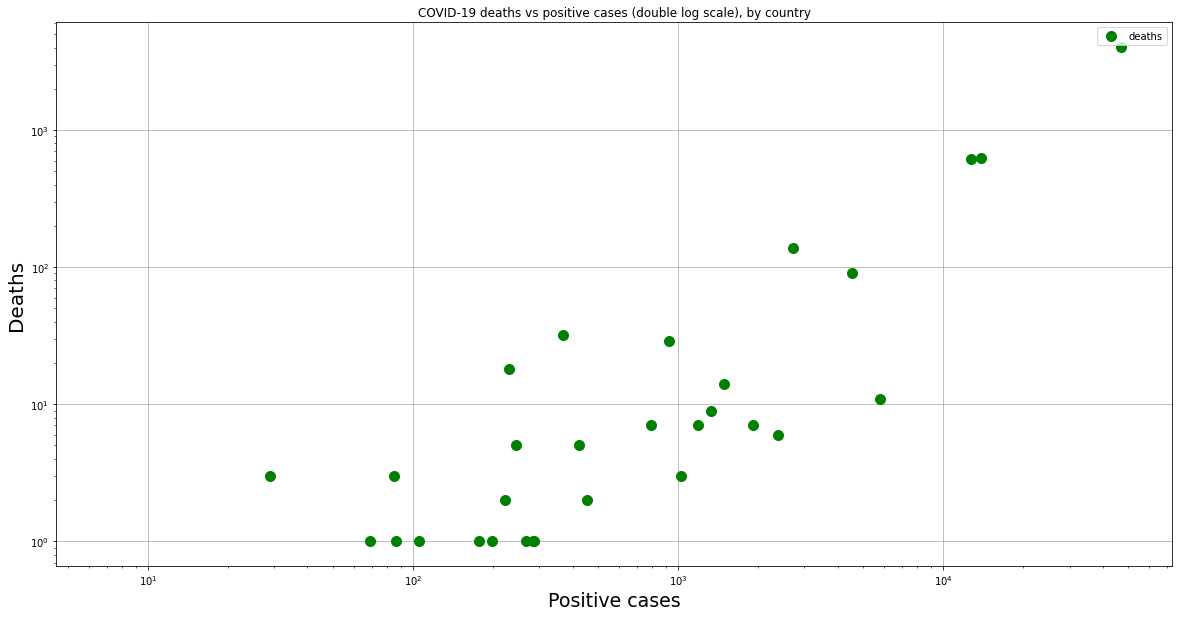

In [30]:
nrow=1
ncol=1
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        test_conf.plot("conf","deaths", color='green', marker='o', linewidth=0, markersize=10, 
                       logy=True, logx=True, grid=True, ax=axes,
                       title="COVID-19 deaths vs positive cases (double log scale), by country", figsize = (20,10))
        axes.set_xlabel("Positive cases", fontsize=19)
        axes.set_ylabel("Deaths", fontsize=20)
        count+=1
        #for i, txt in enumerate(test_conf.columns.to_list()):
        #    axes[r,c].annotate(txt, (test_conf["conf"][i], test_conf["deaths"][i]))

        break
        


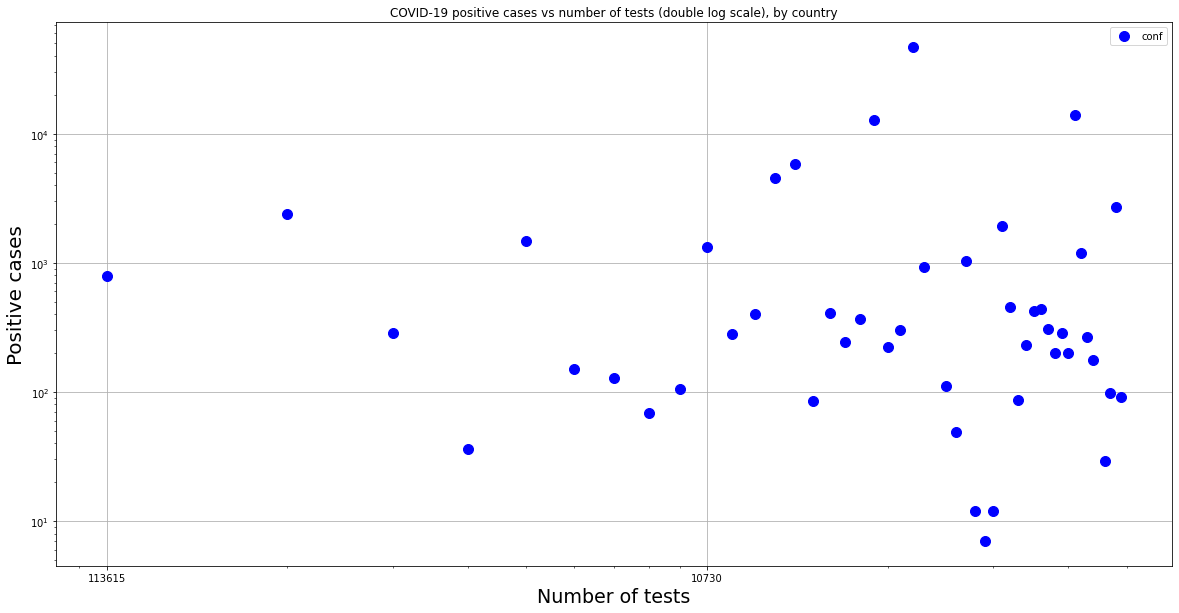

In [31]:
nrow=1
ncol=1
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        test_conf.plot("Total tests","conf", color='blue', marker='o', linewidth=0, markersize=10, 
                       logy=True, logx=True, grid=True, ax=axes,
                       title="COVID-19 positive cases vs number of tests (double log scale), by country", figsize = (20,10))
        axes.set_xlabel("Number of tests", fontsize=19)
        axes.set_ylabel("Positive cases", fontsize=20)
        count+=1
        #for i, txt in enumerate(test_conf.columns.to_list()):
        #    axes[r,c].annotate(txt, (test_conf["conf"][i], test_conf["deaths"][i]))

        break
        


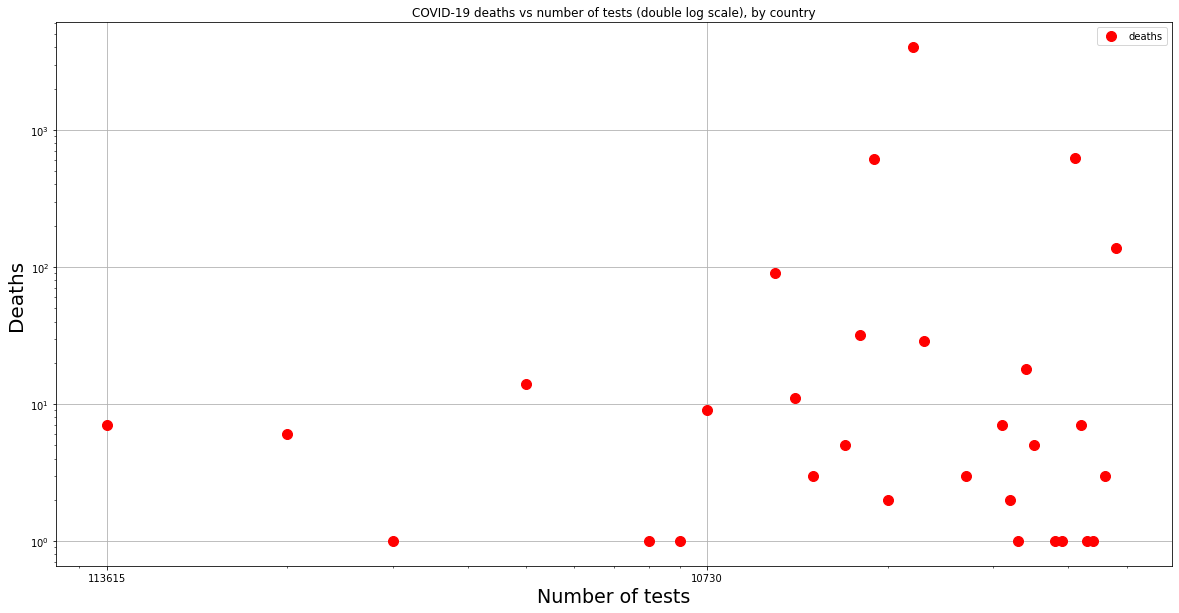

In [32]:
nrow=1
ncol=1
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        test_conf.plot("Total tests","deaths", color='red', marker='o', linewidth=0, markersize=10, 
                       logy=True, logx=True, grid=True, ax=axes,
                       title="COVID-19 deaths vs number of tests (double log scale), by country", figsize = (20,10))
        axes.set_xlabel("Number of tests", fontsize=19)
        axes.set_ylabel("Deaths", fontsize=20)
        count+=1
        #for i, txt in enumerate(test_conf.columns.to_list()):
        #    axes[r,c].annotate(txt, (test_conf["conf"][i], test_conf["deaths"][i]))

        break
        
